# Arts England Grant Allocation Analysis 

### 1. Setting up the Environment


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Configuration for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-whitegrid')

### 2. Loading Data


In [4]:
# Load the data
df25 = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2024-25.csv')
df24 = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2023-24.csv')
df23 = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2022-23.csv')
df22 = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2021-22.csv')
df21 = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2020-21.csv')

# merge all dataframes
#df = pd.concat([df, df, df, df, df], ignore_index=True)

# Join all the dataframes into one
df = pd.concat([df25, df24, df23, df22, df21], ignore_index=True)


# Data loaded successfully print successful statement
if df.empty:
    print("Data loading failed.")
else:
    # Check for missing values
    # missing_values = df.isnull().sum()
    # if missing_values.any():
    #    print("Missing values found in the dataset:")
    #    print(missing_values[missing_values > 0])
    #else:
#print("No missing values found in the dataset.")
    print("Data loaded successfully.")



Data loaded successfully.


### 3. Initial Inspection

In [5]:
# Show the first few rows of the dataframe
#print("Data preview:", df.head(10))
display(df.head(10))

# Check the shape of the dataframe
#print("Dataframe shape:", df.shape)
display(df.shape)

# check the summary statistics of the dataframe
print("Summary statistics in table:",)
display(df.describe(include='all').T)


,Recipient,Activity namE,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand,Time-Limited Priority,Unnamed: 11,Activity name
0,Dominic Bouffard,Art Show at Gallery 46,"£23,336",2-Apr-24,April,Q1,London,Southwark,Visual arts,"£30,000 and below",NaN,NaN,NaN
1,Liv Wynter,Outreach Development & Events for Homeless Queers,"£32,210",2-Apr-24,April,Q1,London,Lewisham,Combined arts,"£30,000 and below",NaN,NaN,NaN
2,Ealing Council,New Gen Festival Development 2024,"£28,420",2-Apr-24,April,Q1,London,Ealing,Music,"£30,000 and below",NaN,NaN,NaN
3,Mark Smith,SYNERGY: A UK/South Africa Disabled Dance Exch...,"£86,835",3-Apr-24,April,Q1,London,Islington,Dance,"Above £30,000",NaN,NaN,NaN
4,Queer East CIC,Queer East Festival 2024,"£30,000",3-Apr-24,April,Q1,London,Westminster,Combined arts,"£30,000 and below",NaN,NaN,NaN
5,Joe Carnall,How Could I Forget R&D Resubmission,"£18,588",3-Apr-24,April,Q1,North,Sheffield,Theatre,"£30,000 and below",NaN,NaN,NaN
6,Penella Styles,Azra GLOW,"£28,500",3-Apr-24,April,Q1,North,Sunderland,Theatre,"£30,000 and below",NaN,NaN,NaN
7,Holly Harman,Penny Fiddle Records (PFR): Empowering Womxn M...,"£29,640",3-Apr-24,April,Q1,South East,Hastings,Music,"£30,000 and below",NaN,NaN,NaN
8,Grace Dickson Productions,Playfight - Tour & National Engagement Programme,"£31,498",3-Apr-24,April,Q1,London,Merton,Theatre,"£30,000 and below",NaN,NaN,NaN
9,BULLYACHE,WHO HURT YOU? Creation - 3rd Submission,"£34,649",3-Apr-24,April,Q1,South East,Reading,Dance,"£30,000 and below",NaN,NaN,NaN


(15468, 13)

Summary statistics in table:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recipient,15466,9996,Read Now Write Now,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity namE,2471,2470,Creative Pathways,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Award amount,15466,8461,"£15,000",943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Award date,15466,777,16-Dec-20,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision Month,15466,12,October,1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision quarter,15466,4,Q3,4316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACE Area,15466,5,London,4222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Local authority,15465,333,Hackney,454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main discipline,15466,11,Theatre,4865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strand,15466,19,"£30,000 and below",6940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the data types of the columns
print("Data types:")
display(df.dtypes)


# Show the last few rows of the dataframe
print("Data preview: last 10 rows") 
display(df.tail(10))

# Show basic statistics of the dataframe
print("\nBasic stats") 
df.info()

Data types:


Recipient                 object
Activity namE             object
Award amount              object
Award date                object
Decision Month            object
Decision quarter          object
ACE Area                  object
Local authority           object
Main discipline           object
Strand                    object
Time-Limited Priority     object
Unnamed: 11              float64
Activity name             object
dtype: object

Data preview: last 10 rows


,Recipient,Activity namE,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand,Time-Limited Priority,Unnamed: 11,Activity name
15458,Helen Clare Farrow,NaN,"£15,000",25-Mar-21,March,Q4,London,Richmond upon Thames,Visual arts,"£15,000 and below",NaN,NaN,Reinventing Texture: Japan
15459,Union Chapel Project,NaN,"£14,656",25-Mar-21,March,Q4,London,Islington,Music,"£15,000 and below",NaN,NaN,Union Chapel Project
15460,Holly Argent,NaN,"£30,769",25-Mar-21,March,Q4,North,Gateshead,Visual arts,"Above £15,000",NaN,NaN,Women Artists of the North East Library 2021-22
15461,Theatre Temoin Limited,NaN,"£30,000",25-Mar-21,March,Q4,South East,Colchester,Theatre,"Above £15,000",NaN,NaN,Local Voices
15462,Creative Arts East,NaN,"£49,648",25-Mar-21,March,Q4,South East,South Norfolk,Combined arts,"Above £15,000",NaN,NaN,Plugged In
15463,FarGo Village,NaN,"£49,990",26-Mar-21,March,Q4,Midlands,Coventry,Combined arts,"Above £15,000",NaN,NaN,FarGo Village Outdoor Arts creative programming
15464,Rugby League World Cup 2021,NaN,"£949,581",26-Mar-21,March,Q4,North,Trafford,Combined arts,"National activity above £100,000",NaN,NaN,RLWC2021 Culture Festival
15465,Jaivant Patel Company CIC,NaN,"£49,995",26-Mar-21,March,Q4,Midlands,Wolverhampton,Dance,"Above £15,000",NaN,NaN,Next Steps Resubmission
15466,Humanhood,NaN,"£250,000",26-Mar-21,March,Q4,Midlands,Birmingham,Dance,"National activity above £100,000",NaN,NaN,"Two years of artistic development, YinYang and ∞"
15467,Ort Gallery,NaN,"£70,073",26-Mar-21,March,Q4,Midlands,Birmingham,Visual arts,"Above £15,000",NaN,NaN,Warmth



Basic stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15468 entries, 0 to 15467
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recipient              15466 non-null  object 
 1   Activity namE          2471 non-null   object 
 2   Award amount           15466 non-null  object 
 3   Award date             15466 non-null  object 
 4   Decision Month         15466 non-null  object 
 5   Decision quarter       15466 non-null  object 
 6   ACE Area               15466 non-null  object 
 7   Local authority        15465 non-null  object 
 8   Main discipline        15466 non-null  object 
 9   Strand                 15466 non-null  object 
 10  Time-Limited Priority  606 non-null    object 
 11  Unnamed: 11            0 non-null      float64
 12  Activity name          12995 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.5+ MB


### 4. Identifying Common Data Issues

### Missing Values Analysis

,Missing Values,Missing Percentage
Unnamed: 11,15468,100.00
Time-Limited Priority,14862,96.08
Activity namE,12997,84.03
Activity name,2473,15.99
Local authority,3,0.02
Decision Month,2,0.01
Award date,2,0.01
Award amount,2,0.01
Recipient,2,0.01
Main discipline,2,0.01


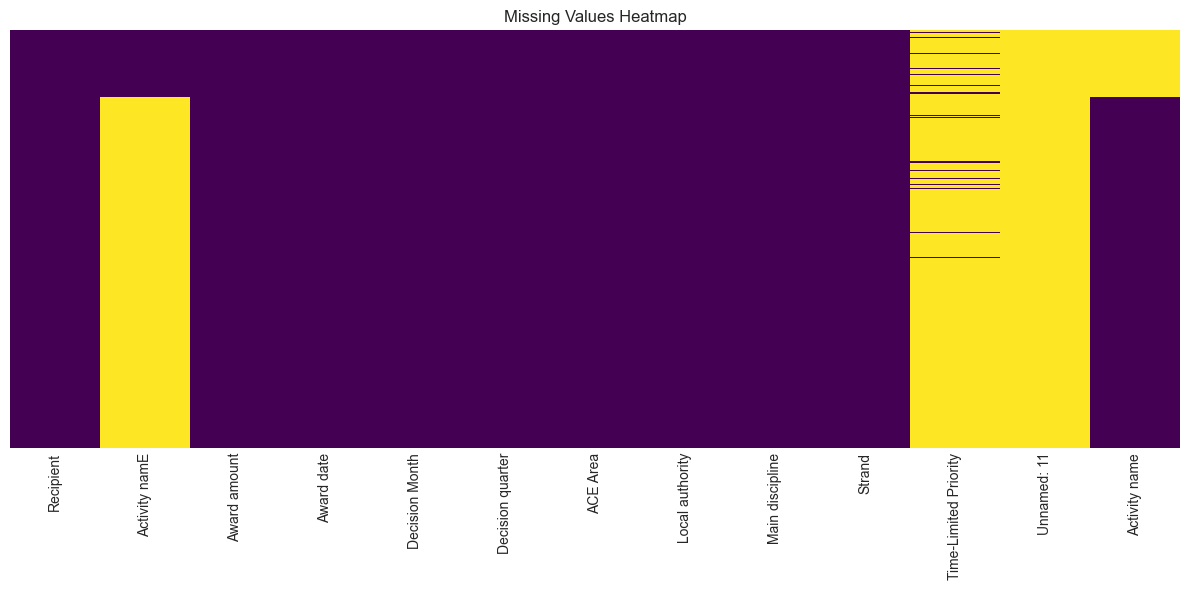

In [7]:

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Sort by missing percentage
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Percentage', ascending=False)
display(missing_info)

# Visualize missing values
if not missing_info.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

# Check for missing values
#print("Missing values:", df.isnull().sum())
# Check for duplicate rows
#print("Duplicate rows:", df.duplicated().sum())
# Check the number of unique values in each column
#print("Unique values:", df.nunique())



### Duplicate Records

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    # Show examples of duplicates
    display(df[df.duplicated(keep=False)].sort_values(by=df.columns[0]).head())
    
# Show all columns in the dataframe
#pd.set_option('display.max_columns', None)

# Display the first few rows of the dataframe
#print("Data preview:", df.head(1))

Number of duplicate rows: 1


,Recipient,Activity namE,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand,Time-Limited Priority,Unnamed: 11,Activity name
12528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Type Issues

In [42]:
# Check data types
print("Data types:")
display(df.dtypes)

# Remove £ and convert to numeric
df['award_amount'] = df['award_amount'].str.replace('£', '').str.replace(',', '').astype(float)

# Identify numeric columns incorrectly stored as objects
potential_numeric = []
for col in df.select_dtypes(include=['object']).columns:
    # Check if most values in the column can be converted to numeric
    numeric_count = sum(pd.to_numeric(df[col], errors='coerce').notnull())
    if numeric_count > 0.5 * len(df):
        potential_numeric.append(col)

print(f"Potential numeric columns stored as objects: {potential_numeric}")

Data types:


recipient_id        float64
recipient            object
activity_name        object
award_amount         object
award_date           object
decision_month       object
decision_quarter     object
ace_area             object
local_authority      object
main_discipline      object
Strand               object
Activity name        object
dtype: object

Potential numeric columns stored as objects: []


### Outlier Detection

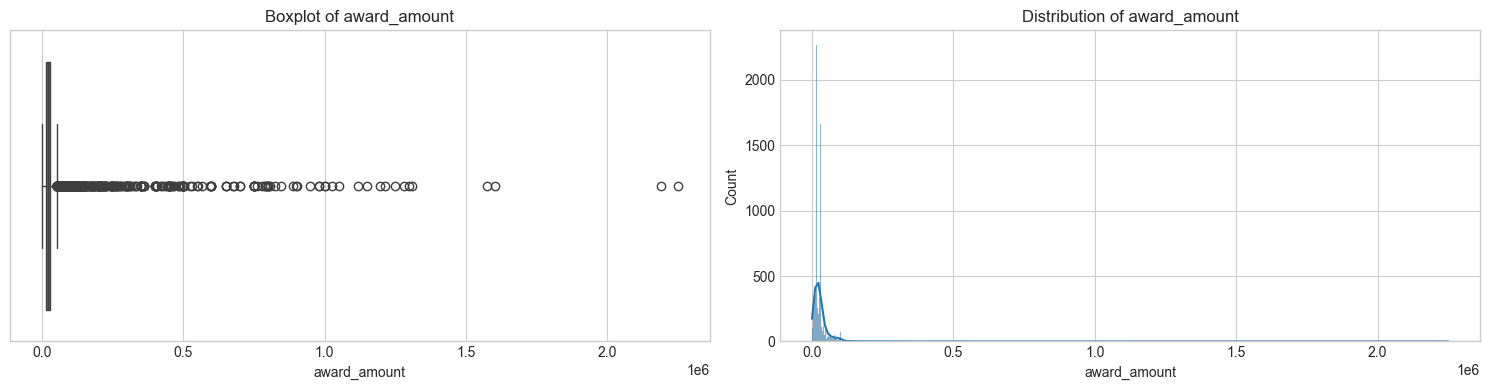

In [43]:
# Function to detect outliers in numeric columns
def detect_outliers(df, numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Filter out numeric columns with all NaN values
    numeric_cols = [col for col in numeric_cols if df[col].notna().any()]
    
    if not numeric_cols:
        print("No numeric columns with valid data to plot.")
        return
    
    plt.figure(figsize=(15, len(numeric_cols) * 4))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2*i+1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.subplot(len(numeric_cols), 2, 2*i+2)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

# Detect outliers in numeric columns (limit to 5 columns for clarity)
numeric_cols = df.select_dtypes(include=['number']).columns[:5]
detect_outliers(df, numeric_cols)

### Inconsistent Text Values


In [44]:
# Function to detect inconsistent text values
def check_text_inconsistencies(df, sample_size=10):
    text_cols = df.select_dtypes(include=['object']).columns
    
    for col in text_cols:
        # Check for mixed case
        values = df[col].dropna().astype(str)
        if len(values) > 0:
            lower_values = sum(values.str.islower())
            upper_values = sum(values.str.isupper())
            title_values = sum(values.str.istitle())
            
            print(f"\nColumn: {col}")
            print(f"Total non-null values: {len(values)}")
            print(f"Lowercase values: {lower_values} ({lower_values/len(values)*100:.1f}%)")
            print(f"Uppercase values: {upper_values} ({upper_values/len(values)*100:.1f}%)")
            print(f"Title case values: {title_values} ({title_values/len(values)*100:.1f}%)")
            
            # Show value counts
            value_counts = df[col].value_counts().head(sample_size)
            if len(value_counts) > 1:
                print("Sample values:")
                display(value_counts)

check_text_inconsistencies(df)


Column: recipient
Total non-null values: 15466
Lowercase values: 234 (1.5%)
Uppercase values: 404 (2.6%)
Title case values: 12203 (78.9%)
Sample values:


recipient
Read Now Write Now            12
-                             12
Sohaya Visions                12
New Diorama                   11
Musa M'Boob                   10
Far From The Norm              9
James Wilton Dance Limited     9
Spiltmilk Dance                9
Autin Dance Theatre            9
18 Hours Ltd                   9
Name: count, dtype: int64


Column: activity_name
Total non-null values: 2471
Lowercase values: 13 (0.5%)
Uppercase values: 81 (3.3%)
Title case values: 1093 (44.2%)
Sample values:


activity_name
Creative Pathways                                       2
SYNERGY: A UK/South Africa Disabled Dance Exchange      1
Queer East Festival 2024                                1
How Could I Forget R&D Resubmission                     1
The Homosexual Audacity: Celebrating Queer Identity.    1
Ray Lee R&D 2024                                        1
Art Show at  Gallery 46                                 1
Live Music in Lewisham Libraries                        1
BeatGeek 2025                                           1
Neurodivergent Friendly Libraries                       1
Name: count, dtype: int64


Column: award_date
Total non-null values: 15466
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 15466 (100.0%)
Sample values:


award_date
16-Dec-20    111
15-Dec-21    103
21-Oct-20    102
14-Jul-21    100
16-Jun-21     98
21-Apr-21     98
30-Jun-21     91
7-Jul-21      85
3-Mar-21      84
9-Sep-20      83
Name: count, dtype: int64


Column: decision_month
Total non-null values: 15466
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 15466 (100.0%)
Sample values:


decision_month
October      1566
December     1413
August       1356
November     1337
January      1319
September    1297
March        1292
February     1288
April        1226
July         1167
Name: count, dtype: int64


Column: decision_quarter
Total non-null values: 15466
Lowercase values: 0 (0.0%)
Uppercase values: 15466 (100.0%)
Title case values: 15466 (100.0%)
Sample values:


decision_quarter
Q3    4316
Q4    3899
Q2    3820
Q1    3431
Name: count, dtype: int64


Column: ace_area
Total non-null values: 15466
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 15466 (100.0%)
Sample values:


ace_area
London        4222
North         3721
South East    3362
Midlands      2194
South West    1967
Name: count, dtype: int64


Column: local_authority
Total non-null values: 15465
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 13108 (84.8%)
Sample values:


local_authority
Hackney              454
Brighton and Hove    443
Birmingham           424
Manchester           409
Bristol, City of     393
Leeds                322
Lambeth              304
Southwark            297
Lewisham             296
Islington            281
Name: count, dtype: int64


Column: main_discipline
Total non-null values: 15466
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 10278 (66.5%)
Sample values:


main_discipline
Theatre                    4865
Combined arts              2718
Music                      2606
Visual arts                2322
Dance                      1415
Literature                 1076
Museums                     189
Not discipline specific     148
Libraries                    99
Digital Arts                 26
Name: count, dtype: int64


Column: Strand
Total non-null values: 15466
Lowercase values: 11777 (76.1%)
Uppercase values: 0 (0.0%)
Title case values: 3057 (19.8%)
Sample values:


Strand
£30,000 and below                            6940
£15,000 and below                            4837
Above £30,000                                1199
Over £15,000                                  705
Below £30,000                                 571
Above £15,000                                 347
Above £30,000 - Over £30k Touring project     281
Grassroots Music                              152
National Activity Under £100k                 131
National activity £100,000 and below           68
Name: count, dtype: int64


Column: Activity name
Total non-null values: 12995
Lowercase values: 102 (0.8%)
Uppercase values: 546 (4.2%)
Title case values: 6284 (48.4%)
Sample values:


Activity name
Organisational Development          11
-                                    7
Stories We Tell                      4
PercWorks                            4
The Stopping Place                   4
NQ Jazz                              3
Who Cares?                           3
Rosslyn Court                        3
Supporting Grassroots Live Music     3
Reaching Out                         3
Name: count, dtype: int64

## 4. Cleaning and Transforming Data


### Handling Missing Values


In [45]:
# Function to handle missing values
def handle_missing_values(df):
    # Create a copy to avoid modifying the original DataFrame
    cleaned_df = df.copy()
    
    for col in df.columns:
        missing_pct = df[col].isnull().mean()
        
        # If more than 80% missing, consider dropping the column
        if missing_pct > 0.9:
            print(f"Dropping column {col} with {missing_pct*100:.1f}% missing values")
            cleaned_df = cleaned_df.drop(columns=[col])
        
        # For categorical columns, fill with mode
        """elif df[col].dtype == 'object':
            mode_val = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
            cleaned_df[col] = cleaned_df[col].fillna(mode_val)
            print(f"Filled column {col} with mode: {mode_val}")"""
        
        # For numeric columns, fill with median
        """elif pd.api.types.is_numeric_dtype(df[col]):
        median_val = df[col].median()
        cleaned_df[col] = cleaned_df[col].fillna(median_val)
        print(f"Filled column {col} with median: {median_val}")"""
    
    return cleaned_df

# Apply missing value handling
cleaned_df = handle_missing_values(df)

Dropping column recipient_id with 100.0% missing values


### Removing Duplicates


In [46]:
# Remove duplicate rows
original_rows = len(cleaned_df)
cleaned_df = cleaned_df.drop_duplicates()
removed_rows = original_rows - len(cleaned_df)
print(f"Removed {removed_rows} duplicate rows")

Removed 0 duplicate rows


### Fixing Data Types


In [47]:
# Function to convert columns to appropriate data types based on arts_awards schema
def fix_data_types(df):
    df_fixed = df.copy()
    
    # Create a new column for recipient_id or handle existing one
    if 'recipient_id' not in df.columns:
        print("Creating new recipient_id column")
        # Add recipient_id as the first column
        df_fixed.insert(0, 'recipient_id', None)
    else:
        # Clean and convert existing recipient_id values
        df_fixed['recipient_id'] = df_fixed['recipient_id'].astype(str).replace('nan', None)
        # Convert to numeric
        df_fixed['recipient_id'] = pd.to_numeric(df_fixed['recipient_id'], errors='coerce')
        # Flag rows where conversion failed
        invalid_ids = df_fixed['recipient_id'].isnull() & df['recipient_id'].notnull()
        if invalid_ids.any():
            print(f"Warning: {invalid_ids.sum()} invalid recipient_id values")
            print("Sample invalid values:")
            display(df.loc[invalid_ids, 'recipient_id'].head())

    # Ensure recipient_id is the first column (if it's not already)
    if 'recipient_id' in df_fixed.columns and df_fixed.columns[0] != 'recipient_id':
        # Get all columns except recipient_id
        other_cols = [col for col in df_fixed.columns if col != 'recipient_id']
        # Reorder columns with recipient_id first
        df_fixed = df_fixed[['recipient_id'] + other_cols]
        print("Moved recipient_id to be the first column")

    # Check if recipient_id values respect SMALLINT UNSIGNED constraints
    if 'recipient_id' in df_fixed.columns and not df_fixed['recipient_id'].isnull().all():
        # Check for negative values
        negative_ids = (df_fixed['recipient_id'] < 0) & df_fixed['recipient_id'].notnull()
        if negative_ids.any():
            print(f"Warning: {negative_ids.sum()} recipient_id values are negative (should be UNSIGNED)")
            print("Setting negative values to NULL")
            df_fixed.loc[negative_ids, 'recipient_id'] = None
        
        # Check for values exceeding SMALLINT range (max 65535)
        large_ids = (df_fixed['recipient_id'] > 65535) & df_fixed['recipient_id'].notnull()
        if large_ids.any():
            print(f"Warning: {large_ids.sum()} recipient_id values exceed SMALLINT UNSIGNED limit (65535)")
            print("Setting oversized values to NULL")
            df_fixed.loc[large_ids, 'recipient_id'] = None
        
        # Check for non-integer values
        fractional_ids = (df_fixed['recipient_id'] % 1 != 0) & df_fixed['recipient_id'].notnull()
        if fractional_ids.any():
            print(f"Warning: {fractional_ids.sum()} recipient_id values have decimal parts (should be integer)")
            print("Converting to integers by truncating decimal parts")
            df_fixed.loc[fractional_ids, 'recipient_id'] = df_fixed.loc[fractional_ids, 'recipient_id'].apply(int)

    # Ensure award_amount is decimal/numeric
    if 'award_amount' in df.columns:
        df_fixed['award_amount'] = pd.to_numeric(df['award_amount'], errors='coerce')
    
    # Convert award_date to datetime
    # Date format is assumed to be DD-MM-YYYY
    # If the date format is different, adjust the format string accordingly
    if 'award_date' in df.columns:
        df_fixed['award_date'] = pd.to_datetime(df['award_date'], errors='coerce')
        # Flag rows where conversion failed
        invalid_dates = df_fixed['award_date'].isnull() & df['award_date'].notnull()
        if invalid_dates.any():
            print(f"Warning: {invalid_dates.sum()} invalid date values in award_date")
            print("Sample invalid values:")
            display(df.loc[invalid_dates, 'award_date'].head())
    
    # Convert decision_month and decision_quarter to proper strings
    for col in ['decision_month', 'decision_quarter']:
        if col in df.columns:
            df_fixed[col] = df_fixed[col].astype(str).replace('nan', None)
    
    # Convert text fields according to schema
    text_fields = ['recipient', 'activity_name', 'ace_area', 'local_authority', 'main_discipline']
    for col in text_fields:
        if col in df.columns:
            df_fixed[col] = df_fixed[col].astype(str).replace('nan', None)
    
    return df_fixed

# Fix data types
try:
    cleaned_df = fix_data_types(cleaned_df)
    print("Data types fixed according to arts_awards schema")
    display(cleaned_df.dtypes)
except NameError as e:
    print(f"Error: {e}")

Creating new recipient_id column


/var/folders/c9/7_72dlr944l61btxxt5tkfd40000gp/T/ipykernel_24125/3267016227.py:61: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Data types fixed according to arts_awards schema


recipient_id                object
recipient                   object
activity_name               object
award_amount               float64
award_date          datetime64[ns]
decision_month              object
decision_quarter            object
ace_area                    object
local_authority             object
main_discipline             object
Strand                      object
Activity name               object
dtype: object

### Standardizing Text Values


In [48]:
# Function to standardize text values according to arts_awards schema
def standardize_text(df):
    df_std = df.copy()
    
    # Standardize recipient (NVARCHAR(50))
    if 'recipient' in df.columns:
        # Title case for organizations/people names
        df_std['recipient'] = df_std['recipient'].str.title()
        # Truncate if needed
        if df_std['recipient'].str.len().max() > 150:
            print("Warning: Some recipient names exceed 50 characters and will be truncated")
            df_std['recipient'] = df_std['recipient'].str.slice(0, 150)
    
    # Standardize activity_name (NVARCHAR(200))
    if 'activity_name' in df.columns:
        # Title case for activity names
        df_std['activity_name'] = df_std['activity_name'].str.title()
        # Truncate if needed
        if df_std['activity_name'].str.len().max() > 300:
            print("Warning: Some activity names exceed 200 characters and will be truncated")
            df_std['activity_name'] = df_std['activity_name'].str.slice(0, 300)
    
    # Standardize decision_month (VARCHAR(15))
    if 'decision_month' in df.columns:
        # Capitalize month names
        df_std['decision_month'] = df_std['decision_month'].str.capitalize()
        # Ensure valid month names
        valid_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                        'July', 'August', 'September', 'October', 'November', 'December']
        invalid_months = ~df_std['decision_month'].isin(valid_months) & (df_std['decision_month'].notna())
        if invalid_months.any():
            print(f"Warning: {invalid_months.sum()} invalid month values in decision_month")
            print("Invalid months will be standardized or set to None")
            
            # Attempt to standardize common variations
            month_map = {
                'jan': 'January', 'feb': 'February', 'mar': 'March', 
                'apr': 'April', 'may': 'May', 'jun': 'June',
                'jul': 'July', 'aug': 'August', 'sep': 'September', 'sept': 'September',
                'oct': 'October', 'nov': 'November', 'dec': 'December'
            }
            
            for abbr, full in month_map.items():
                mask = df_std['decision_month'].str.lower().str.startswith(abbr, na=False)
                df_std.loc[mask, 'decision_month'] = full
    
    # Standardize decision_quarter (VARCHAR(2))
    if 'decision_quarter' in df.columns:
        # Standardize quarter format (Q1, Q2, Q3, Q4)
        df_std['decision_quarter'] = df_std['decision_quarter'].str.upper()
        
        # Fix common variations
        quarter_map = {'1': 'Q1', '2': 'Q2', '3': 'Q3', '4': 'Q4',
                      'QTR1': 'Q1', 'QTR2': 'Q2', 'QTR3': 'Q3', 'QTR4': 'Q4'}
        
        for var, std in quarter_map.items():
            mask = df_std['decision_quarter'].str.strip() == var
            df_std.loc[mask, 'decision_quarter'] = std
        
        # Validate quarters
        valid_quarters = ['Q1', 'Q2', 'Q3', 'Q4']
        invalid_quarters = ~df_std['decision_quarter'].isin(valid_quarters) & (df_std['decision_quarter'].notna())
        
        if invalid_quarters.any():
            print(f"Warning: {invalid_quarters.sum()} invalid quarter values in decision_quarter")
            print("Sample invalid values:")
            display(df.loc[invalid_quarters, 'decision_quarter'].head())
    
    # Standardize ace_area and local_authority (NVARCHAR(50))
    for col in ['ace_area', 'local_authority']:
        if col in df.columns:
            # Title case for geographical names
            df_std[col] = df_std[col].str.title()
            # Truncate if needed
            if df_std[col].str.len().max() > 100:
                print(f"Warning: Some {col} values exceed 50 characters and will be truncated")
                df_std[col] = df_std[col].str.slice(0, 100)
    
    # Standardize main_discipline (VARCHAR(20))
    if 'main_discipline' in df.columns:
        # Title case for discipline names
        df_std['main_discipline'] = df_std['main_discipline'].str.title()
        # Truncate if needed
        if df_std['main_discipline'].str.len().max() > 50:
            print(f"Warning: Some main_discipline values exceed 20 characters and will be truncated")
            df_std['main_discipline'] = df_std['main_discipline'].str.slice(0, 50)
        
        # You might want to standardize common disciplines here
        # Example:
        discipline_map = {
            'Vis Art': 'Visual Arts',
            'Visual': 'Visual Arts',
            'Music': 'Music',
            'Theatre': 'Theatre',
            'Theater': 'Theatre',
            'Dance': 'Dance',
            'Lit': 'Literature',
            'Literature': 'Literature'
            # Add more mappings as needed
        }
        
        for old, new in discipline_map.items():
            mask = df_std['main_discipline'].str.contains(old, case=False, na=False)
            if mask.any() and new[:50] != old[:20]:  # Only replace if different
                print(f"Standardized '{old}' to '{new}' in main_discipline")
                df_std.loc[mask, 'main_discipline'] = new[:20]  # Apply with truncation
    
    return df_std

# Standardize text values
cleaned_df = standardize_text(cleaned_df)
print("Text values standardized according to arts_awards schema")
display(cleaned_df.head(3))


Standardized 'Visual' to 'Visual Arts' in main_discipline
Standardized 'Lit' to 'Literature' in main_discipline
Text values standardized according to arts_awards schema


,recipient_id,recipient,activity_name,award_amount,award_date,decision_month,decision_quarter,ace_area,local_authority,main_discipline,Strand,Activity name
0,None,Dominic Bouffard,Art Show At Gallery 46,23336.0,2024-04-02,April,Q1,London,Southwark,Visual Arts,"£30,000 and below",NaN
1,None,Liv Wynter,Outreach Development & Events For Homeless Queers,32210.0,2024-04-02,April,Q1,London,Lewisham,Combined Arts,"£30,000 and below",NaN
2,None,Ealing Council,New Gen Festival Development 2024,28420.0,2024-04-02,April,Q1,London,Ealing,Music,"£30,000 and below",NaN


### Handling Outliers


In [49]:
# Function to handle outliers using IQR method
def handle_outliers(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['number']).columns
    
    df_clean = df.copy()
    
    for col in cols:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        if outliers > 0:
            print(f"Column {col}: Found {outliers} outliers")
            
            # Cap outliers instead of removing them
            df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
            print(f"Capped outliers in {col} to range [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    return df_clean

# Handle outliers in numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['number']).columns
cleaned_df = handle_outliers(cleaned_df, numeric_cols)
display(cleaned_df.describe())

Column award_amount: Found 1601 outliers
Capped outliers in award_amount to range [-8448.75, 53069.25]


,award_amount,award_date
count,15466.000000,15466
mean,24540.948290,2022-08-23 17:25:35.807577600
min,0.000000,2020-04-06 00:00:00
25%,14620.500000,2021-06-16 00:00:00
50%,21120.000000,2022-07-12 00:00:00
75%,30000.000000,2023-10-18 00:00:00
max,53069.250000,2025-02-27 00:00:00
std,14231.417562,NaN


### Renaming Columns for SQL Compatibility


In [50]:
# Function to rename columns according to arts_awards schema
def rename_columns_for_schema(df):
    # Define the expected column names for arts_awards schema
    schema_columns = [
        'recipient_id', 'recipient', 'activity_name', 'award_amount',
        'award_date', 'decision_month', 'decision_quarter', 'ace_area',
        'local_authority', 'main_discipline'
    ]
    
    # Create a mapping of current columns to schema columns
    current_cols = df.columns
    rename_dict = {}
    
    # Try to match existing columns to schema columns based on similarity
    for schema_col in schema_columns:
        # Check for direct match first
        if schema_col in current_cols:
            continue
            
        # Check for case-insensitive match
        matches = [col for col in current_cols if col.lower() == schema_col.lower()]
        if matches:
            rename_dict[matches[0]] = schema_col
            continue
            
        # Check for similar names (handles spaces, underscores, etc.)
        schema_col_clean = schema_col.lower().replace('_', '')
        for col in current_cols:
            col_clean = col.lower().replace('_', '').replace(' ', '')
            
            # Match on various patterns
            if (schema_col_clean in col_clean or 
                col_clean in schema_col_clean or
                (schema_col_clean[:5] == col_clean[:5] and len(col_clean) > 4)):
                
                # Check if this column is already mapped
                if col not in rename_dict:
                    rename_dict[col] = schema_col
                    break
    
    # Apply the renaming
    if rename_dict:
        print("Renaming columns to match arts_awards schema:")
        for old, new in rename_dict.items():
            print(f"  {old} -> {new}")
        
        df_renamed = df.rename(columns=rename_dict)
    else:
        df_renamed = df.copy()
        print("No columns needed renaming")
    
    # Check for missing schema columns
    missing_cols = [col for col in schema_columns if col not in df_renamed.columns]
    if missing_cols:
        print(f"\nWarning: The following schema columns are missing: {missing_cols}")
        
        # Add missing columns with appropriate null values
        for col in missing_cols:
            if col == 'recipient_id':
                # Auto-increment field can be left for MySQL to handle
                continue
            elif col == 'award_date':
                # Required DATE field - add as NaT for now, but will need attention
                df_renamed[col] = pd.NaT
                print(f"Added missing required column '{col}' with NaT values - needs attention!")
            elif col in ['recipient', 'activity_name']:
                # Required NVARCHAR fields
                df_renamed[col] = None
                print(f"Added missing required column '{col}' with NULL values - needs attention!")
            else:
                # Optional fields
                df_renamed[col] = None
                print(f"Added missing optional column '{col}' with NULL values")
    
    # Check for extra columns not in the schema
    extra_cols = [col for col in df_renamed.columns if col not in schema_columns]
    if extra_cols:
        print(f"\nInfo: The following columns are not in the arts_awards schema: {extra_cols}")
        print("These columns will be included in the output but won't be imported to the schema")
    
    return df_renamed

# Rename columns to match schema
cleaned_df = rename_columns_for_schema(cleaned_df)

No columns needed renaming

Info: The following columns are not in the arts_awards schema: ['Strand', 'Activity name']
These columns will be included in the output but won't be imported to the schema


## Final Validation and Export

In [20]:
#  export the cleaned dataframe
output_path = 'cleaned_arts_awards_2.csv'
try:
    cleaned_df.to_csv(output_path, index=False, date_format='%d-%m-%Y')
    print(f"\nCleaned data exported to {output_path}")
except Exception as e:
    print(f"\nError exporting cleaned data to CSV: {e}")
# Optional: Uncomment to visualize the cleaned dataframe
#display(cleaned_df.head(10))



    # Export the cleaned dataframe
    #output_path = 'cleaned_arts_awards.csv'
    #try:
        #cleaned_df.to_csv(output_path, index=False, date_format='%Y-%m-%d')
        #print(f"\nCleaned data exported to {output_path}")
    #except Exception as e:
        #print(f"\nError exporting cleaned data to CSV: {e}")



Cleaned data exported to cleaned_arts_awards_2.csv


## Analysis and Visualisation

>The objectives of this report is to determine the factors that can help artists, and creative communities secure grants from the Arts Council.

### Setup and Data Import 
Initialising the necessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#import geopandas as gpd
import folium
from folium.plugins import HeatMap
import statsmodels.api as sm
from scipy import stats
from sklearn.cluster import KMeans

In [ ]:
# Set visualization styles
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

In [51]:
df_eda = cleaned_df.copy()
#pd.read_csv('cleaned_arts_awards_2.csv')

# Display the first few rows
df_eda.head(5)

,recipient_id,recipient,activity_name,award_amount,award_date,decision_month,decision_quarter,ace_area,local_authority,main_discipline,Strand,Activity name
0,None,Dominic Bouffard,Art Show At Gallery 46,23336.00,2024-04-02,April,Q1,London,Southwark,Visual Arts,"£30,000 and below",NaN
1,None,Liv Wynter,Outreach Development & Events For Homeless Queers,32210.00,2024-04-02,April,Q1,London,Lewisham,Combined Arts,"£30,000 and below",NaN
2,None,Ealing Council,New Gen Festival Development 2024,28420.00,2024-04-02,April,Q1,London,Ealing,Music,"£30,000 and below",NaN
3,None,Mark Smith,Synergy: A Uk/South Africa Disabled Dance Exch...,53069.25,2024-04-03,April,Q1,London,Islington,Dance,"Above £30,000",NaN
4,None,Queer East Cic,Queer East Festival 2024,30000.00,2024-04-03,April,Q1,London,Westminster,Combined Arts,"£30,000 and below",NaN


### Key Questions and Findings

1. What is being funded?: Analyzes disciplines receiving funding through:

Summary statistics of award amounts
Bar charts showing counts by discipline
Treemaps showing funding distribution
Keyword analysis of activity names

In [52]:
#1. Summary statistics of award amounts
print("Summary Statistics of Award Amounts:")
print(df_eda['award_amount'].describe())

Summary Statistics of Award Amounts:
count    15466.000000
mean     24540.948290
std      14231.417562
min          0.000000
25%      14620.500000
50%      21120.000000
75%      30000.000000
max      53069.250000
Name: award_amount, dtype: float64


In [53]:
#1.2 Distribution of awards by discipline
discipline_counts = df_eda['main_discipline'].value_counts()
discipline_funding = df_eda.groupby('main_discipline')['award_amount'].sum().sort_values(ascending=False)

#print(f" Whats going on? \n{discipline_counts}, \n{discipline_funding}")
display(discipline_counts)
display(discipline_funding)


main_discipline
Theatre                    4865
Combined Arts              2718
Music                      2606
Visual Arts                2322
Dance                      1415
Literature                 1076
Museums                     189
Not Discipline Specific     148
Libraries                    99
Digital Arts                 26
Other/Not Known               2
Name: count, dtype: int64

main_discipline
Theatre                    1.127292e+08
Combined Arts              7.667136e+07
Music                      5.958834e+07
Visual Arts                5.225195e+07
Dance                      3.832698e+07
Literature                 2.472508e+07
Museums                    5.674586e+06
Not Discipline Specific    5.469881e+06
Libraries                  3.239679e+06
Digital Arts               8.313738e+05
Other/Not Known            4.187400e+04
Name: award_amount, dtype: float64

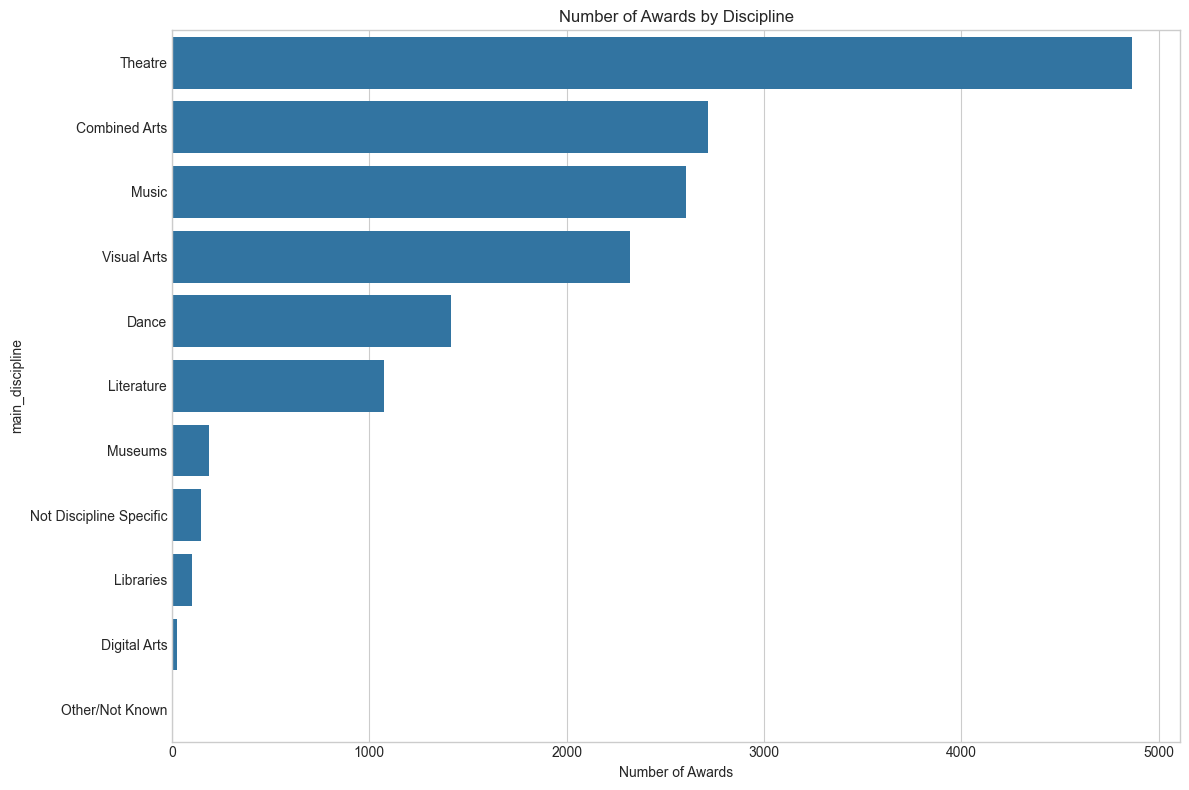

In [54]:
# Visualization: Bar chart of award counts by discipline
plt.figure(figsize=(12, 8))
sns.barplot(x=discipline_counts.values, y=discipline_counts.index)
plt.title('Number of Awards by Discipline')
plt.xlabel('Number of Awards')
plt.tight_layout()
plt.show()

In [55]:
# Ensure there are no missing values in the 'main_discipline' column
df_eda_filtered = df_eda.dropna(subset=['main_discipline'])

# Visualization: Treemap of funding by discipline
fig = px.treemap(df_eda_filtered, path=['main_discipline'], values='award_amount',
                 title='Funding Distribution Across Disciplines')
fig.show()

In [56]:
# Get the data from the sheet
df_vis = df_eda.copy()
#df_pie_chart = df_vis(first_row_header=True)
#df_htmp = []
# Ensure Award amount is treated as numeric
df_vis['award_amount'] = pd.to_numeric(df_vis['award_amount'], errors='coerce')

# Group by ACE Area and Main discipline, then sum the Award amounts
discipline_by_area = df_vis.groupby(['ace_area', 'main_discipline'])['award_amount'].sum().reset_index()

# Create a pivot table for easier visualization
pivot_data = discipline_by_area.pivot(index='main_discipline', columns='ace_area', values='award_amount').fillna(0)

# Get the top disciplines by total award amount to keep the chart readable
top_disciplines = discipline_by_area.groupby('main_discipline')['award_amount'].sum().nlargest(8).index.tolist()
pivot_filtered = pivot_data.loc[top_disciplines]

# Create heatmap
fig = px.imshow(pivot_filtered,
                labels=dict(x="ACE area", y="Main discipline", color="Award Amount (£)"),
                title="Funding Distribution by Discipline Across ACE Areas",
                color_continuous_scale="Viridis",
                text_auto='.2s')  # Show values in cells with abbreviated format

# Update layout for better readability
fig.update_layout(
    height=700,
    margin=dict(l=150, r=50, t=50, b=50),
    coloraxis_colorbar=dict(title="Award Amount (£)")
)

# Improve y-axis readability
fig.update_yaxes(
    tickmode="array",
    tickvals=list(range(len(top_disciplines))),
    ticktext=top_disciplines
)

fig.show()

2. Where is it being funded?: Examines geographic patterns using:

Bar charts of funding by Arts Council area
Visualization of top local authorities
Choropleth maps showing regional distribution
Heat maps of funding density

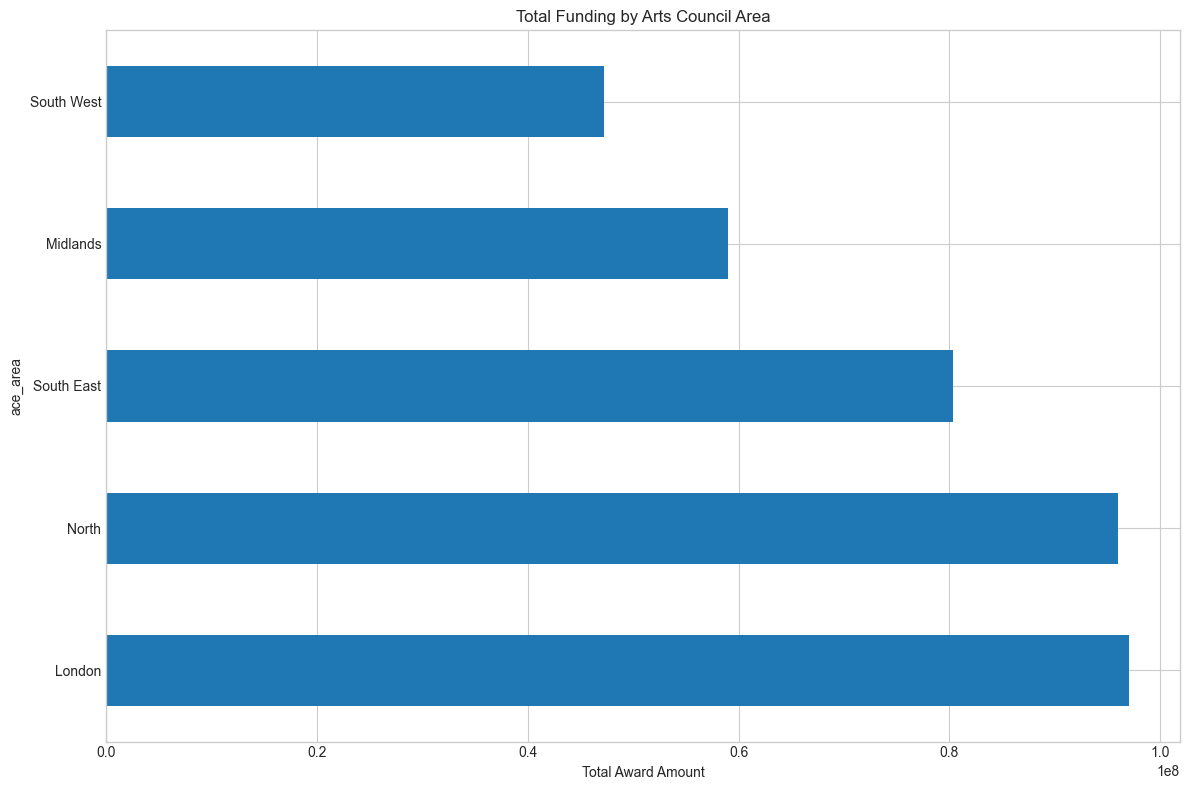

In [57]:
# 2. Geographic Analysis - Where is it being funded?

# 2.1 Distribution by Arts Council area
council_funding = df_vis.groupby('ace_area')['award_amount'].agg(['sum', 'count', 'mean'])
council_funding = council_funding.sort_values('sum', ascending=False)

# Visualization: Horizontal bar chart of funding by Arts Council area
plt.figure(figsize=(12, 8))
council_funding['sum'].plot(kind='barh')
plt.title('Total Funding by Arts Council Area')
plt.xlabel('Total Award Amount')
plt.tight_layout()
plt.show()

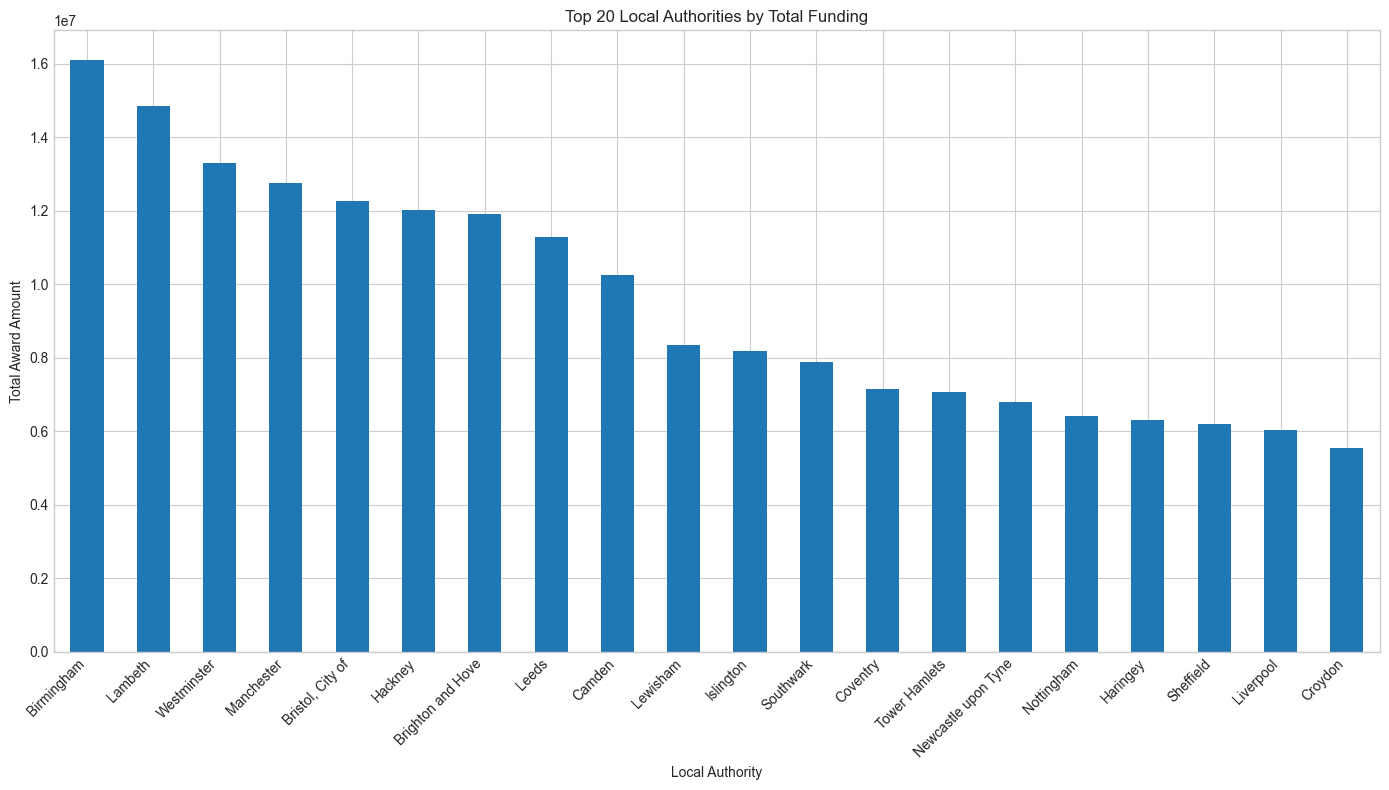

In [58]:
# 2.2 Distribution by Local Authority
authority_funding = df.groupby('local_authority')['award_amount'].sum().sort_values(ascending=False)
top_authorities = authority_funding.head(20)

# Visualization: Bar chart of top 20 local authorities by funding
plt.figure(figsize=(14, 8))
top_authorities.plot(kind='bar')
plt.title('Top 20 Local Authorities by Total Funding')
plt.xlabel('Local Authority')
plt.ylabel('Total Award Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#2.3 Geographic Heat Map (requires UK shapefile)
# Load UK shapefile (you'll need to download this)
uk_gdf = gpd.read_file('UK_local_authorities.shp')

# Merge with our funding data
# Note: This assumes the names match between datasets, may need to clean/map names
funding_geo = uk_gdf.merge(authority_funding.reset_index(), 
                           left_on='authority_name', 
                           right_on='Local authority', 
                           how='left')

In [ ]:
#2.4 Create a Folium map
# Create choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
funding_geo.plot(column='award_amount', 
                 cmap='viridis', 
                 legend=True,
                 legend_kwds={'label': "Award Amount"},
                 ax=ax)
ax.set_title('Funding Distribution Across UK Local Authorities')
plt.tight_layout()
plt.show()

In [ ]:
#Alternative: Interactive Folium map
# Convert to latitude/longitude (this would require geocoding your local authorities)
# This is a placeholder - you would need to add actual lat/long data
df_with_coords = df  # Replace with actual geocoding

m = folium.Map(location=[55, -3], zoom_start=5)  # Center of UK
heat_data = [[row['latitude'], row['longitude'], row['award_amount']] 
             for _, row in df_with_coords.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('funding_heatmap.html')

3. Timing Patterns: Analyzes when funding is awarded through:

Time series plots showing trends
Seasonal analysis by month and quarter

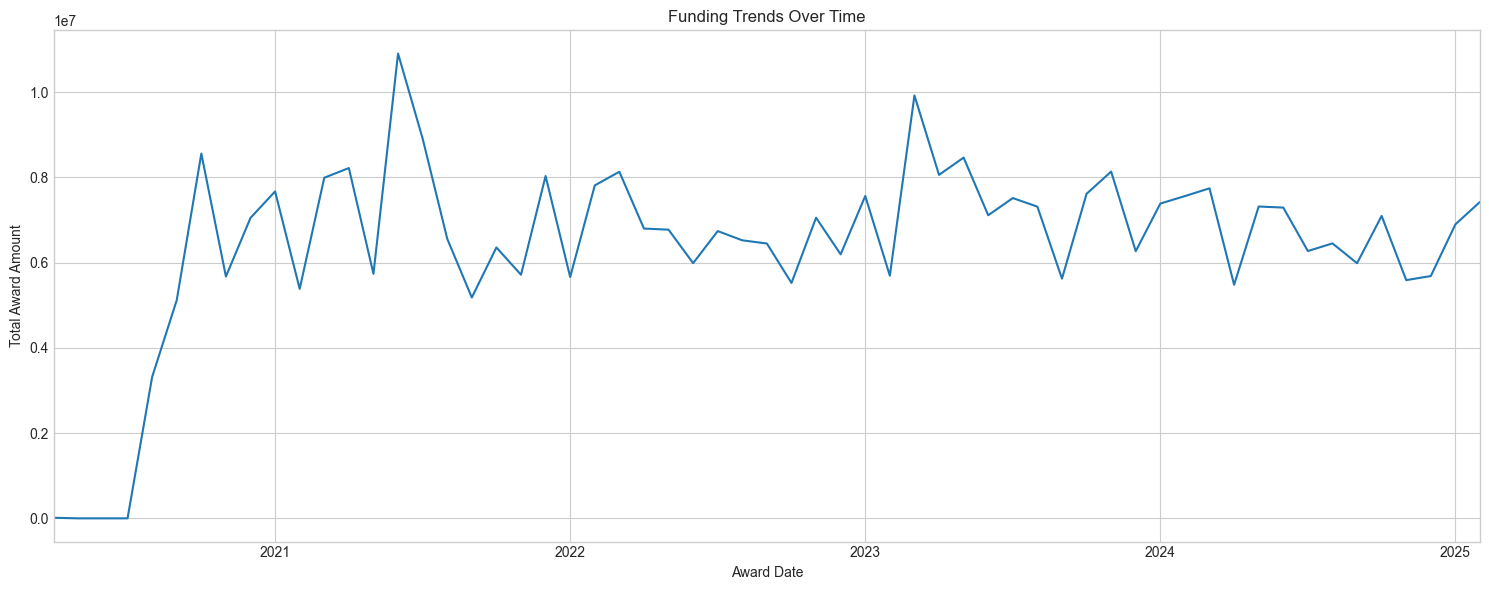

In [ ]:
# 3. Temporal Analysis - Timing Patterns
df_time = df_vis.copy()

# 3.1 Funding trends over time
time_series = df_time.groupby(df_time['award_date'].dt.to_period('M'))['award_amount'].sum()
time_series = time_series.reindex(pd.period_range(time_series.index.min(), 
                                                time_series.index.max(), 
                                                freq='M'))
time_series = time_series.fillna(0)

# Visualization: Time series plot
plt.figure(figsize=(15, 6))
time_series.plot()
plt.title('Funding Trends Over Time')
plt.xlabel('Award Date')
plt.ylabel('Total Award Amount')
plt.tight_layout()
plt.show()

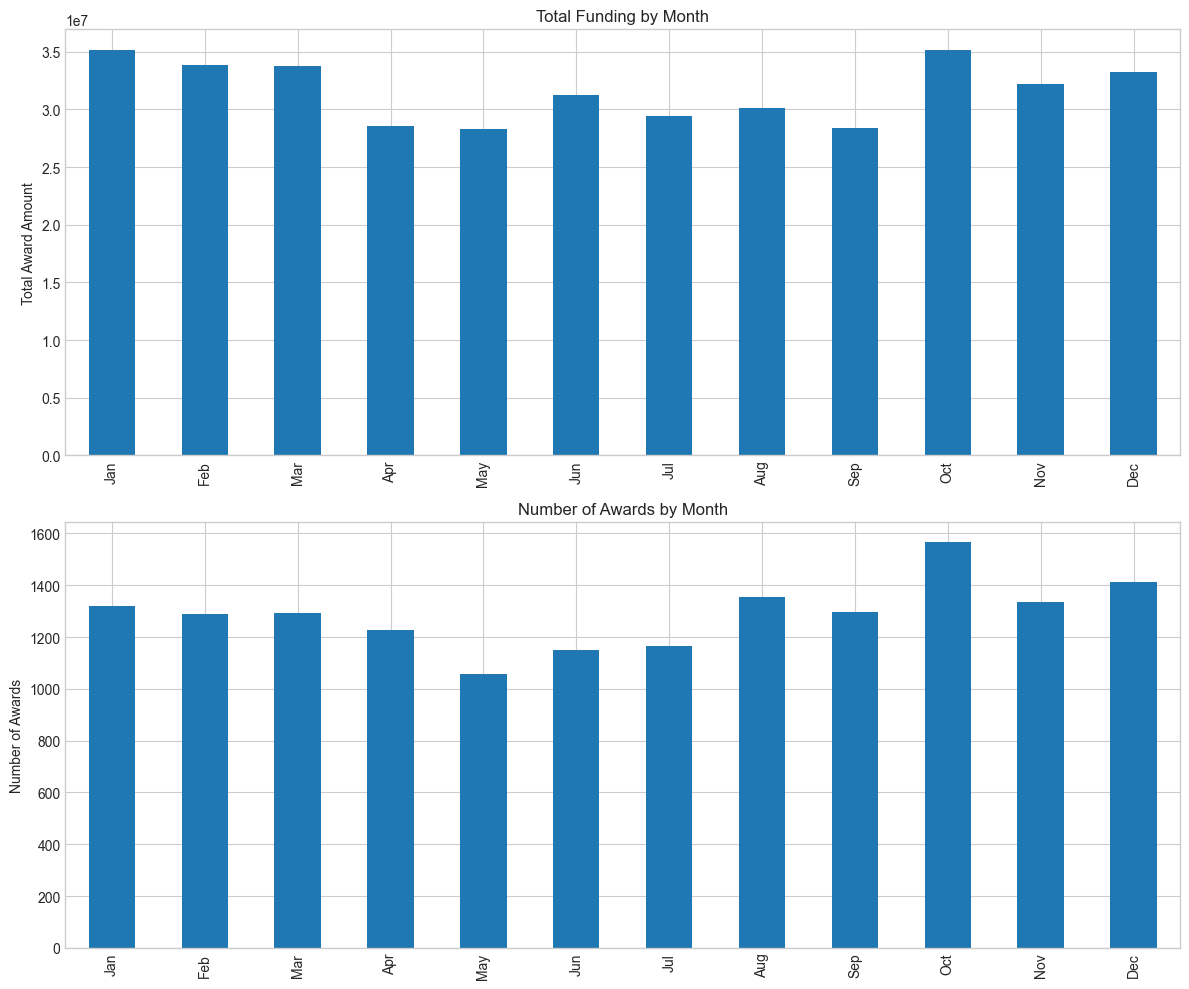

In [68]:
# Ensure 'award_date' is in datetime format
df_time['award_date'] = pd.to_datetime(df_time['award_date'], errors='coerce')

# 3.2 Seasonality analysis
seasonal = df_time.groupby(df_time['award_date'].dt.month)['award_amount'].agg(['sum', 'count'])
seasonal.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Visualization: Monthly patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
seasonal['sum'].plot(kind='bar', ax=ax1)
ax1.set_title('Total Funding by Month')
ax1.set_ylabel('Total Award Amount')
seasonal['count'].plot(kind='bar', ax=ax2)
ax2.set_title('Number of Awards by Month')
ax2.set_ylabel('Number of Awards')
plt.tight_layout()
plt.show()

4. Award Size Analysis: Examines funding amounts using:

Box plots by discipline
Histograms of award distributions

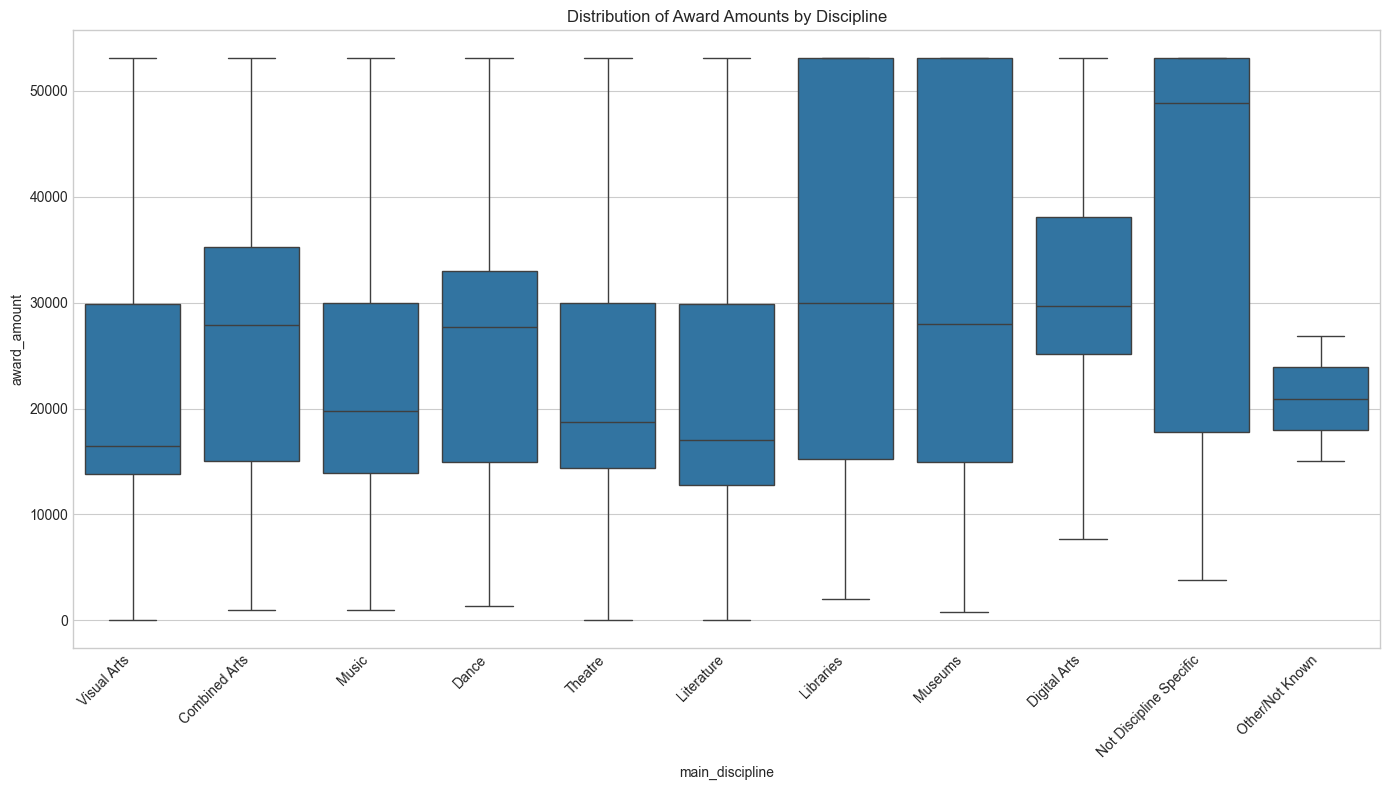

In [ ]:
# 4.1 Box plots of award amounts by discipline
plt.figure(figsize=(14, 8))
sns.boxplot(x='Main Discipline', y='Award Amount', data=df_vis.copy())
plt.title('Distribution of Award Amounts by Discipline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

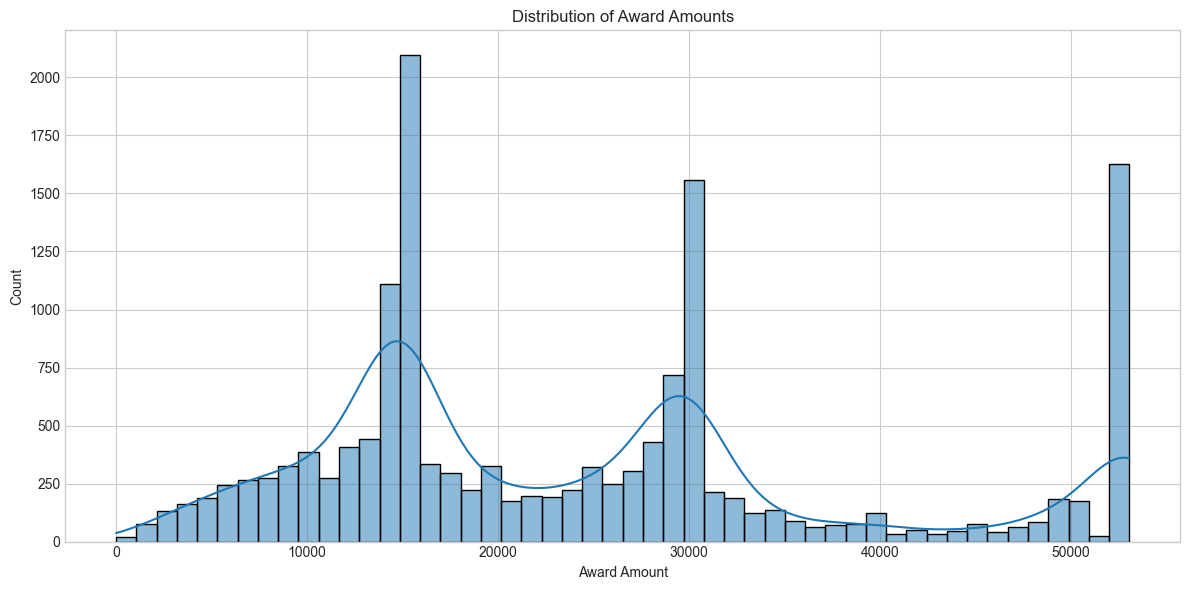

In [71]:
# 6.2 Award amount distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_vis.copy()['award_amount'], bins=50, kde=True)
plt.title('Distribution of Award Amounts')
plt.xlabel('Award Amount')
plt.tight_layout()
plt.show()

5. Multidimensional Analysis: Looks at relationships between dimensions:

Heatmaps of discipline by region
Bubble charts showing multiple dimensions at once


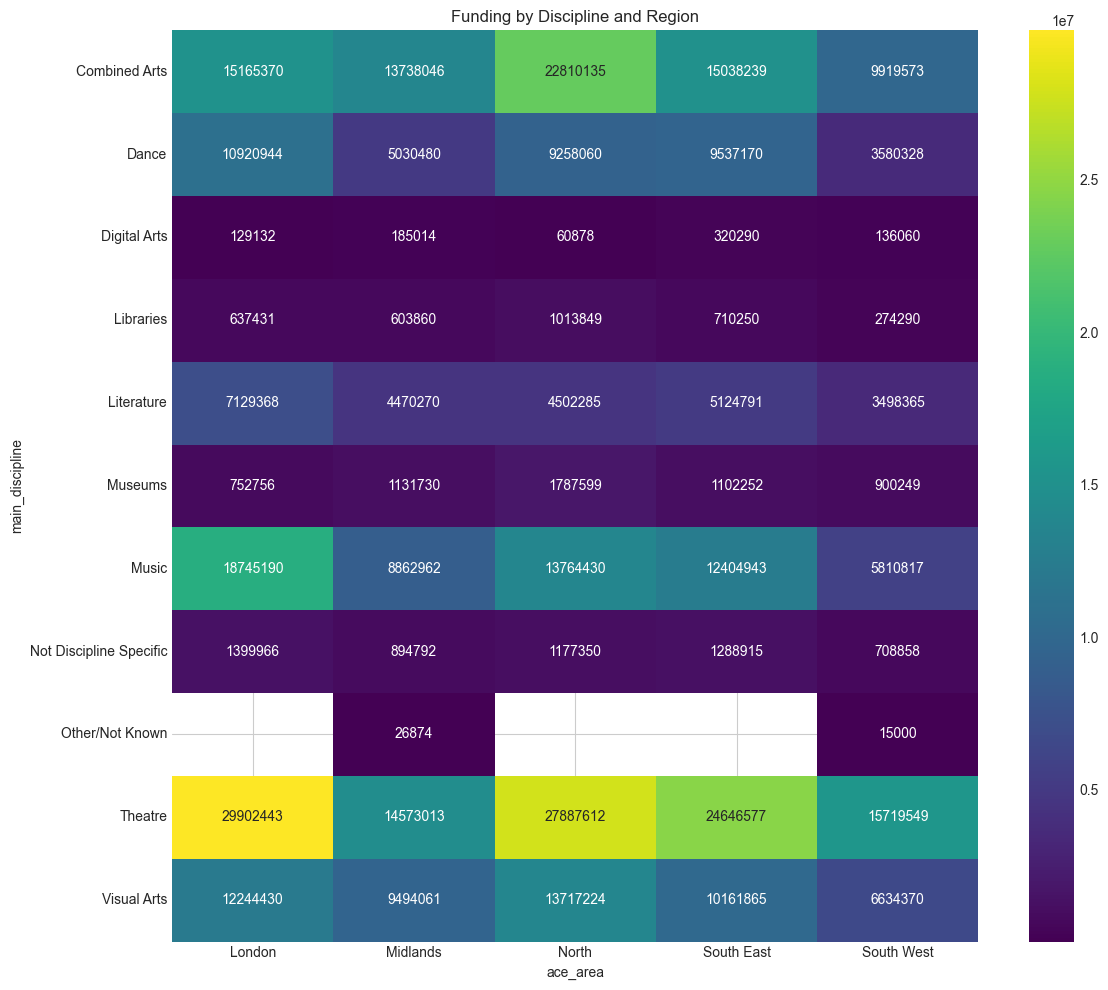

In [72]:
# 5. Multidimensional Analysis

# 5.1 Discipline by region heatmap
discipline_region = pd.crosstab(df_vis.copy()['main_discipline'], df['ace_area'], 
                               values=df_vis.copy()['award_amount'], aggfunc='sum')

plt.figure(figsize=(12, 10))
sns.heatmap(discipline_region, annot=True, fmt='.0f', cmap='viridis')
plt.title('Funding by Discipline and Region')
plt.tight_layout()
plt.show()

In [75]:
# 7.2 Bubble chart: discipline, region and funding
# Prepare data for bubble chart
bubble_data = df_vis.copy().groupby(['main_discipline', 'ace_area'])['award_amount'].agg(['sum', 'count']).reset_index()

# Create bubble chart with Plotly
fig = px.scatter(bubble_data, 
                x='main_discipline', 
                y='ace_area', 
                size='sum',
                color='count',
                hover_name='main_discipline',
                size_max=60,
                title='Relationship Between Discipline, Region and Funding')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

6. Success Factors Analysis: If you have data on successful vs. unsuccessful applications

7. Correlation Analysis: Identifies factors most correlated with award amounts

In [78]:
# 7. Correlation Analysis

# 7.1 Correlation between award amount and other variables
# Ensure the columns to be one-hot encoded exist in the DataFrame
columns_to_encode = ['main_discipline', 'ace_area', 'local_authority']
columns_to_encode = [col for col in columns_to_encode if col in df_vis.columns]

if not columns_to_encode:
	print("No categorical columns available for encoding. Skipping correlation analysis.")
else:
	# One-hot encode categorical variables
	df_encoded = pd.get_dummies(df_vis.copy(), columns=columns_to_encode)

	# Select numeric columns for correlation
	numeric_df = df_encoded.select_dtypes(include=[np.number])

	if 'award_amount' not in numeric_df.columns:
		print("No numeric columns available for correlation analysis. Skipping.")
	else:
		# Calculate correlations with award amount
		correlations = numeric_df.corr()['award_amount'].sort_values(ascending=False)
		top_correlations = correlations[1:11]  # Skip self-correlation

		if top_correlations.empty:
			print("No significant correlations found.")
		else:
			plt.figure(figsize=(12, 6))
			top_correlations.plot(kind='bar')
			plt.title('Top 10 Factors Correlated with Award Amount')
			plt.tight_layout()
			plt.show()

No significant correlations found.


8. Predictive Insights: Uses machine learning to identify key factors that predict funding success

In [85]:
# 10.1 Simple model to predict award amount
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target
# Ensure all columns in X are numeric
X = df_eda.copy().drop('award_amount', axis=1).select_dtypes(include=[np.number])
y = df_eda.copy()['award_amount']

# Check if X is empty
if X.empty:
    print("Error: No numeric features available for the model.")
else:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    print(f"R² Score: {r2_score(y_test, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(model.coef_)
    })
    top_features = feature_importance.sort_values('Importance', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.title('Top 10 Features for Predicting Award Amount')
    plt.tight_layout()
    plt.show()

Error: No numeric features available for the model.


9. Conclusions and Recommendations: Summarizes key findings and provides actionable advice